
Observation 1: Latitude does not seem to have a significant impact on cloudiness in either hemisphere. That said, the northern hemisphere had much higher cloudiness in general.
    
Observation 2: In both hemispheres latitude plays a significant role in temperature. As you get closer to the equator the max temp increases significantly.
    
Observation 3: Latitude did not seem to play a role in wind speeds; however, the highest wind speeds were recorded further from the equator. This is interesting because most of the data shows no correlation but in both hemispheres the highest wind speeds were furthest from the equator.

Imports and File Paths

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

#Import API key

from api_keys import weather_api_key


#citipy


from citipy import citipy



# Range of latitudes and longitudes


lat_range = (-90, 90)
lng_range = (-180, 180)

Generate list of cities with criteria

In [2]:

# List for holding lat amd lngs and cities


lat_lngs = []
cities = []



# Create a set of random lat and lng combinations


lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)



# Identify nearest city for each lat, lng combination and see if unique


for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)

In [3]:

city_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
maxtemp_list = []
wind_list = []
index_counter = 0
set_counter = 1

Perform API Calls and print a log of the cities

In [4]:

print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list


for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        maxtemp_list.append(response['main']['temp_max'])
        wind_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : henties bay
Processing Record 2 of Set 1 : mar del plata
Processing Record 3 of Set 1 : hilo
Processing Record 4 of Set 1 : cherskiy
Processing Record 5 of Set 1 : cape town
Processing Record 6 of Set 1 : concepcion del oro
Processing Record 7 of Set 1 : rikitea
Processing Record 8 of Set 1 : laurel
Processing Record 9 of Set 1 : chuy
Processing Record 10 of Set 1 : normandin
Processing Record 11 of Set 1 : pacifica
Processing Record 12 of Set 1 : thompson
Processing Record 13 of Set 1 : hobart
Processing Record 14 of Set 1 : fonte boa
Processing Record 15 of Set 1 : boa vista
Processing Record 16 of Set 1 : jamestown
Processing Record 17 of Set 1 : constitucion
Processing Record 18 of Set 1 : lazaro cardenas
Processing Record 19 of Set 1 : ushuaia
Processing Record 20 of Set 1 : atuona
Processing Record 21 of Set 1 : biograd na moru
Processing Record 22 of Set 1 : mataura
Processing Record 23 of Set

Processing Record 31 of Set 4 : solnechnyy
Processing Record 32 of Set 4 : quatre cocos
Processing Record 33 of Set 4 : camacha
Processing Record 34 of Set 4 : manicore
Processing Record 35 of Set 4 : nanortalik
Processing Record 36 of Set 4 : faanui
Processing Record 37 of Set 4 : tiksi
Processing Record 38 of Set 4 : zyryanka
Processing Record 39 of Set 4 : yingcheng
Processing Record 40 of Set 4 : southbridge
Processing Record 41 of Set 4 : narok
Processing Record 42 of Set 4 : mocuba
Processing Record 43 of Set 4 : pimentel
Processing Record 44 of Set 4 : dhidhdhoo
Processing Record 45 of Set 4 : ponta do sol
Processing Record 46 of Set 4 : porto novo
Processing Record 47 of Set 4 : bindi
Processing Record 48 of Set 4 : chopda
City not found. Skipping...
Processing Record 49 of Set 4 : dikson
Processing Record 50 of Set 4 : port blair
Processing Record 0 of Set 5 : sorong
Processing Record 1 of Set 5 : severo-kurilsk
Processing Record 2 of Set 5 : carmo do rio claro
Processing Reco

City not found. Skipping...
Processing Record 19 of Set 8 : cabedelo
Processing Record 20 of Set 8 : bucerias
City not found. Skipping...
Processing Record 21 of Set 8 : sarkikaraagac
Processing Record 22 of Set 8 : puerto escondido
Processing Record 23 of Set 8 : yekepa
Processing Record 24 of Set 8 : vardo
Processing Record 25 of Set 8 : ambilobe
City not found. Skipping...
Processing Record 26 of Set 8 : dera ghazi khan
Processing Record 27 of Set 8 : oeiras
Processing Record 28 of Set 8 : sumbe
City not found. Skipping...
Processing Record 29 of Set 8 : karaton
Processing Record 30 of Set 8 : samagaltay
Processing Record 31 of Set 8 : dingle
Processing Record 32 of Set 8 : makakilo city
Processing Record 33 of Set 8 : det udom
City not found. Skipping...
Processing Record 34 of Set 8 : kurilsk
Processing Record 35 of Set 8 : phichit
Processing Record 36 of Set 8 : blackfoot
Processing Record 37 of Set 8 : sri aman
Processing Record 38 of Set 8 : cuenca
City not found. Skipping...
P

Convert the data into a dataframe

In [5]:
weather_df = pd.DataFrame({ 
                "City" : city_list,
                "Country" : country_list,
                "Date" : date_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Cloudiness" : cloudiness_list,
                "Humidity" : humidity_list,
                "Max Temp" : maxtemp_list,
                "Wind Speed" : wind_list
})

In [6]:
weather_df

,City,Country,Date,Lat,Lng,Cloudiness,Humidity,Max Temp,Wind Speed
0,Henties Bay,NA,1622229095,-22.1160,14.2845,3,77,59.86,10.13
1,Mar del Plata,AR,1622228895,-38.0023,-57.5575,0,51,63.09,8.99
2,Hilo,US,1622229096,19.7297,-155.0900,90,68,82.27,4.61
3,Cherskiy,RU,1622229096,68.7500,161.3000,55,48,46.56,17.25
4,Cape Town,ZA,1622229097,-33.9258,18.4232,0,88,60.12,5.37
...,...,...,...,...,...,...,...,...,...
550,Mayor Pablo Lagerenza,PY,1622229282,-19.9309,-60.7718,100,31,94.03,18.95
551,Harar,ET,1622229283,9.3094,42.1258,7,87,58.35,4.34
552,Bahía Blanca,AR,1622229050,-38.7196,-62.2724,86,51,58.98,17.00
553,Thunder Bay,CA,1622229056,48.4001,-89.3168,0,34,58.98,8.72


Save the data into a csv

In [7]:
weather_df.to_csv("output_data/cities.csv", index = False)

Plot Data and save images to Graphs folder

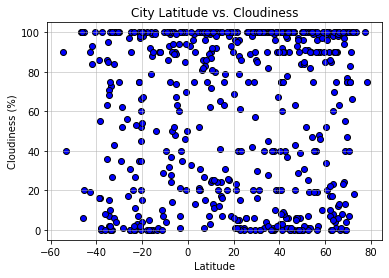

In [8]:
# Create Latitude vs. Cloudiness Scatter

plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor = "blue", edgecolor = "black")



# Set title

plt.title("City Latitude vs. Cloudiness")


# Set x axis label

plt.xlabel("Latitude")


# Set y axis label

plt.ylabel("Cloudiness (%)")


# Set y axis limit

plt.ylim(-5,105)


# Set grid line

plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


# Save the plotted figure as .pngs

plt.savefig("../Graphs/City Latitude vs Cloudiness")

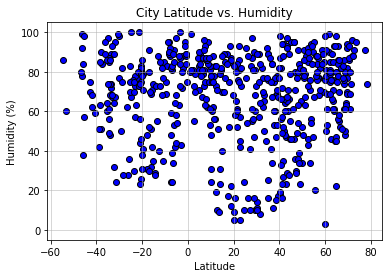

In [9]:
# Create Latitude vs. Humidity Scatter

plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "blue", edgecolor = "black")



# Set title

plt.title("City Latitude vs. Humidity")


# Set x axis label

plt.xlabel("Latitude")


# Set y axis label

plt.ylabel("Humidity (%)")


# Set y axis limit

plt.ylim(-5,105)


# Set grid line

plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


# Save the plotted figure as .pngs

plt.savefig("../Graphs/City Latitude vs Humidity")

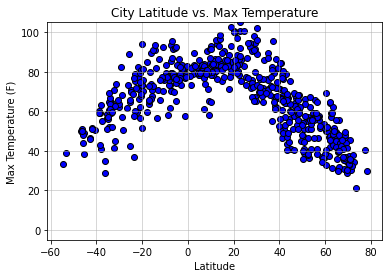

In [10]:
# Create Latitude vs. Max Temperature Scatter

plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor = "blue", edgecolor = "black")



# Set title

plt.title("City Latitude vs. Max Temperature")


# Set x axis label

plt.xlabel("Latitude")


# Set y axis label

plt.ylabel("Max Temperature (F)")


# Set y axis limit

plt.ylim(-5,105)


# Set grid line

plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


# Save the plotted figure as .pngs

plt.savefig("../Graphs/City Latitude vs Max Temperature")

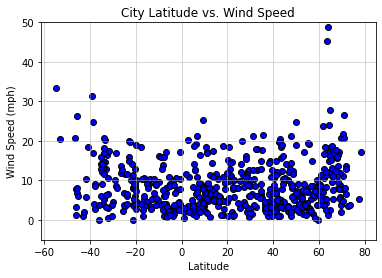

In [11]:
# Create Latitude vs. Wind Speed Scatter

plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor = "blue", edgecolor = "black")



# Set title

plt.title("City Latitude vs. Wind Speed")


# Set x axis label

plt.xlabel("Latitude")


# Set y axis label

plt.ylabel("Wind Speed (mph)")


# Set y axis limit

plt.ylim(-5,50)


# Set grid line

plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


# Save the plotted figure as .pngs

plt.savefig("../Graphs/City Latitude vs Wind Speed")

In [12]:
# Create Northern and Southern Hemisphere DataFrames
north_hemi = weather_df.loc[weather_df["Lat"] >= 0]
south_hemi = weather_df.loc[weather_df["Lat"] < 0]

In [13]:
# Define function for linear regression and scatter plot


def linear_regression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regression_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x, regression_values,"r-")
    return line_eq


# Define a function for annotation


def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

Northern Cloudiness Regression

The r-squared is : -0.04


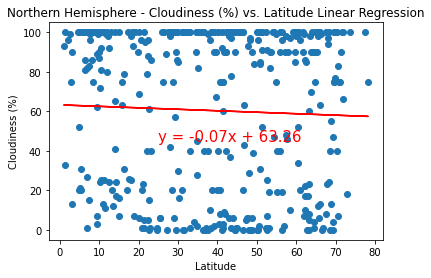

In [14]:
#Call Functions

equation = linear_regression(north_hemi["Lat"], north_hemi["Cloudiness"])

annotate(equation, 25, 45)


# title

plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")


# xlabel

plt.xlabel("Latitude")


# ylabel

plt.ylabel("Cloudiness (%)")


# Save image

plt.savefig("../Graphs/Northern Hemisphere Cloudiness Linear Regression.png")

Southern Cloudiness Regression

The r-squared is : 0.07


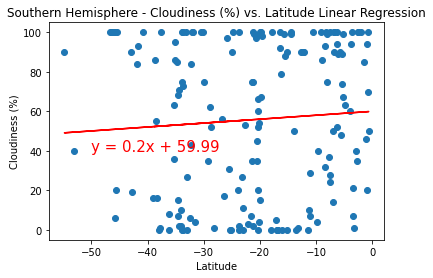

In [15]:
#Call Functions

equation = linear_regression(south_hemi["Lat"], south_hemi["Cloudiness"])

annotate(equation, -50, 40)


# title

plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")


# xlabel

plt.xlabel("Latitude")


# ylabel

plt.ylabel("Cloudiness (%)")


# Save image

plt.savefig("../Graphs/Southern Hemisphere Cloudiness Linear Regression.png")

Northern Humidity Regression

The r-squared is : 0.08


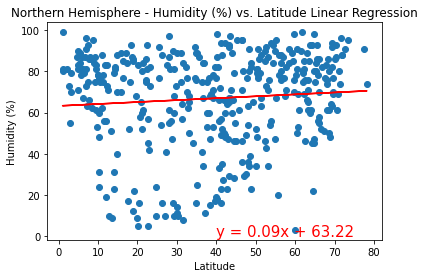

In [16]:
#Call Functions

equation = linear_regression(north_hemi["Lat"], north_hemi["Humidity"])

annotate(equation, 40, 0)


# title

plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")


# xlabel

plt.xlabel("Latitude")


# ylabel

plt.ylabel("Humidity (%)")


# Save image

plt.savefig("../Graphs/Northern Hemisphere Humidity Linear Regression.png")

Southern Humidity Regression

The r-squared is : -0.01


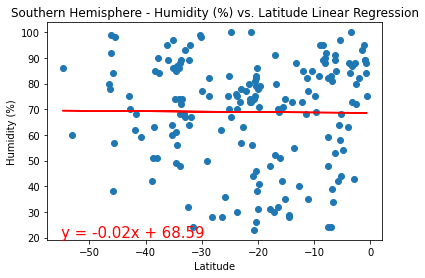

In [22]:
#Call Functions

equation = linear_regression(south_hemi["Lat"], south_hemi["Humidity"])

annotate(equation, -55, 20)


# title

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")


# xlabel

plt.xlabel("Latitude")


# ylabel

plt.ylabel("Humidity (%)")


# Save image

plt.savefig("../Graphs/Southern Hemisphere Humidity Linear Regression.png")

Northern Max Temp Regression

The r-squared is : -0.84


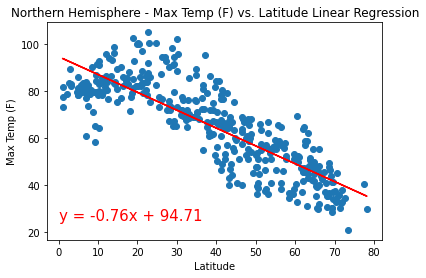

In [23]:
#Call Functions

equation = linear_regression(north_hemi["Lat"], north_hemi["Max Temp"])

annotate(equation, 0, 25)


# title

plt.title("Northern Hemisphere - Max Temp (F) vs. Latitude Linear Regression")


# xlabel

plt.xlabel("Latitude")


# ylabel

plt.ylabel("Max Temp (F)")


# Save image

plt.savefig("../Graphs/Northern Hemisphere Max Temp Linear Regression.png")

Southern Max Temp Regression

The r-squared is : 0.74


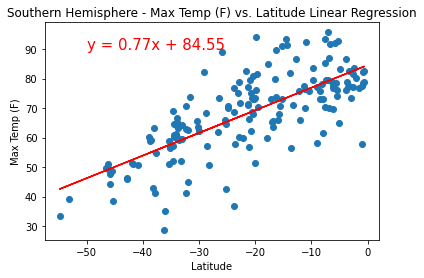

In [24]:
#Call Functions

equation = linear_regression(south_hemi["Lat"], south_hemi["Max Temp"])

annotate(equation, -50, 90)


# title

plt.title("Southern Hemisphere - Max Temp (F) vs. Latitude Linear Regression")


# xlabel

plt.xlabel("Latitude")


# ylabel

plt.ylabel("Max Temp (F)")


# Save image

plt.savefig("../Graphs/Southern Hemisphere Max Temp Linear Regression.png")

Northern Wind Speed Regression

The r-squared is : 0.16


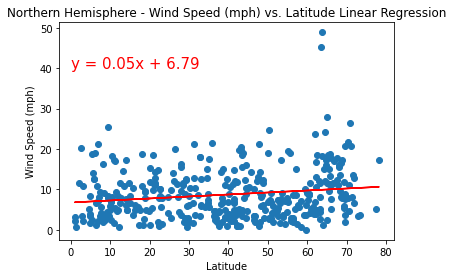

In [25]:
#Call Functions

equation = linear_regression(north_hemi["Lat"], north_hemi["Wind Speed"])

annotate(equation, 0, 40)


# title

plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")


# xlabel

plt.xlabel("Latitude")


# ylabel

plt.ylabel("Wind Speed (mph)")


# Save image

plt.savefig("../Graphs/Northern Hemisphere Wind Speed Linear Regression.png")

Southern Wind Speed Regression

The r-squared is : -0.33


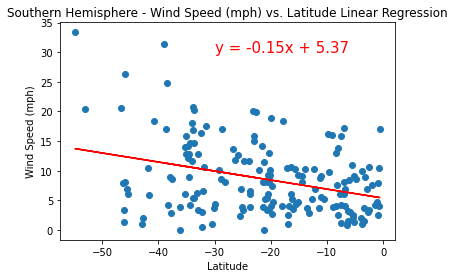

In [26]:
#Call Functions

equation = linear_regression(south_hemi["Lat"], south_hemi["Wind Speed"])

annotate(equation, -30, 30)


# title

plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")


# xlabel

plt.xlabel("Latitude")


# ylabel

plt.ylabel("Wind Speed (mph)")


# Save image

plt.savefig("../Graphs/Southern Hemisphere Wind Speed Linear Regression.png")